# Prophet with sktime

In [14]:
# Imports
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.random.seed(42)

from sktime.datasets import load_airline
from sktime.forecasting.fbprophet import Prophet
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
combined_states = pd.read_csv(f'../data/combined_states.csv', parse_dates=['week'], index_col='week')
combined_states_covid_2020 = combined_states.loc[:'05-2020']
combined_states_covid_2020.tail()

,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
week,,,,,,,,,,
2020-05-03,63.6,61.2,23.9,27.9,38.2,0.7,0.2,0.9,0.9,0.5
2020-05-10,62.7,64.2,23.1,27.4,35.8,0.6,0.3,0.9,0.9,0.5
2020-05-17,57.7,66.6,21.4,29.3,35.7,0.5,0.3,0.9,0.9,0.4
2020-05-24,46.1,67.2,19.3,27.1,33.5,0.4,0.3,0.8,0.8,0.3
2020-05-31,45.6,59.2,20.8,29.7,36.8,0.3,0.3,0.8,0.8,0.3


In [6]:
y = combined_states_covid_2020
y_train, y_test = temporal_train_test_split(y, test_size=12)

In [ ]:
def prophet_model(y_train, y_test, search):
    search_str = search.title()
    if search == 'mental_health':
        search_str = 'Mental Health'
    # Prepare forecaster
    forecaster = Prophet(  
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={'country_name': 'USA'},
    yearly_seasonality=True)
    # Fit forecaster
    forecaster.fit(y_train['depression']) 
    
    y_pred = forecaster.predict(y_test.index) 
    
    mean_squared_error()

In [8]:
forecaster = Prophet(  
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={'country_name': 'USA'},
    yearly_seasonality=True)
forecaster.fit(y_train['depression'])  

y_pred = forecaster.predict(y_test.index) 

14:31:38 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
y_train

,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
week,,,,,,,,,,
2017-12-31,50.4,60.9,23.8,30.0,18.7,0.0,0.0,0.0,0.0,0.0
2018-01-07,57.1,62.3,23.3,32.6,27.0,0.0,0.0,0.0,0.0,0.0
2018-01-14,53.7,59.1,22.5,36.6,29.6,0.0,0.0,0.0,0.0,0.0
2018-01-21,63.6,63.4,23.2,36.2,28.2,0.0,0.0,0.0,0.0,0.0
2018-01-28,61.3,62.3,23.6,36.0,25.6,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-09,58.7,67.0,18.9,37.5,38.6,0.0,0.0,0.0,0.0,0.0
2020-02-16,61.5,71.3,22.1,39.0,38.6,0.0,0.0,0.0,0.0,0.0
2020-02-23,64.6,66.7,26.2,39.9,37.7,0.0,0.0,0.0,0.0,0.0


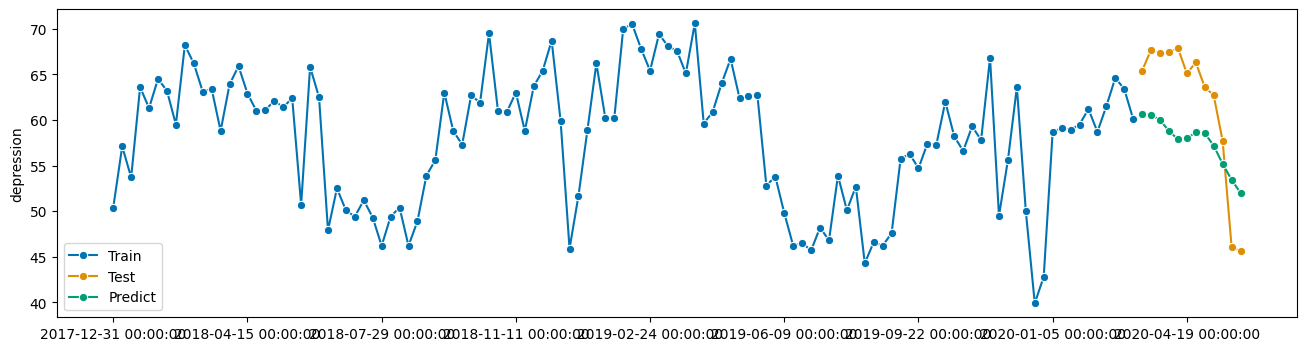

In [13]:
plot_series(y_train['depression'], y_test['depression'], y_pred, labels =['Train', 'Test', 'Predict']);

In [ ]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']

for search in searches_list: